# Assignment: Using Pretrained EfficientNetB7

# Imports

In [ ]:
# !pip uninstall tf-keras
# !pip install tensorflow==2.16.1

In [ ]:
import keras
import tensorflow as tf
print("Keras Current Version:", keras.__version__, "Tensorflow Current Version:", tf.__version__)

Keras Current Version: 3.3.3 Tensorflow Current Version: 2.16.1


In [ ]:
from glob import glob
import random, os, datetime

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model

# Functions

In [ ]:
def get_image_paths(root_dir, num_images=None):
    all_images = []
    for extension in ['*.jpg', '*.jpeg', '*.png']:
        all_images.extend(glob(os.path.join(root_dir, '**', extension), recursive=True))
    if num_images is None:
        return all_images
    else:
        return random.sample(all_images, min(num_images, len(all_images)))

def display_images(img_list):
    plt.figure(figsize=(15, 6))
    for i, img_path in enumerate(img_list):
        img = image.load_img(img_path)
        img = image.img_to_array(img, dtype=np.uint8)
        plt.subplot(2, 5, i + 1)
        plt.imshow(img.squeeze())
        plt.axis('off')
        plt.title(f'Image {i+1}')
    plt.tight_layout()
    plt.show()


def print_predicted_classes(predicted_classes):
    for full_path, (label, probability) in predicted_classes.items():
        filename = os.path.basename(full_path)
        print(f"{filename}: {label} ({probability:.2f}%)")

# Task 1: Google Drive ya da local ortamınızdan imagenet_samples klasörünün dizinini okuyunuz.

# Task 1 Solution

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir_path = '/content/drive/MyDrive/Colab Notebooks/others/imagenet_samples'

# Task 2: Bu dizinden 10 tane resim çekiniz ve gösteriniz.

# Task 2 Solution

In [ ]:
img_list = get_image_paths(dir_path, 10)

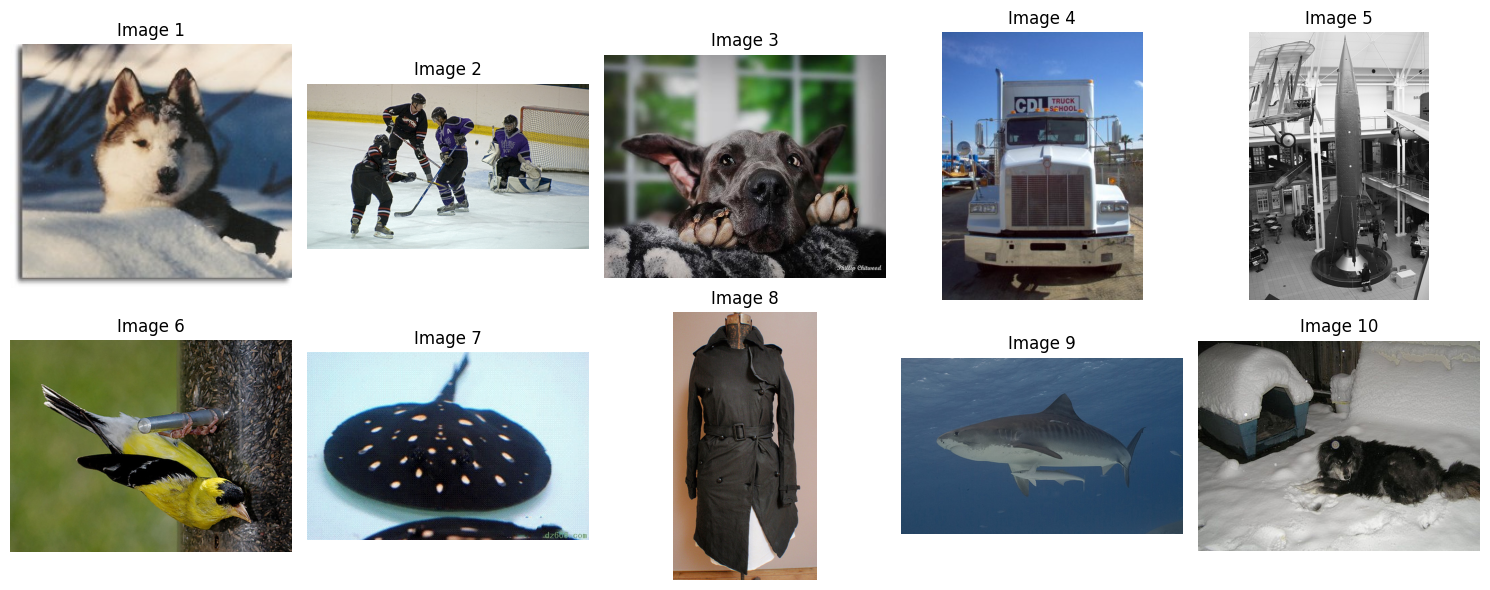

In [ ]:
display_images(img_list)

# Task 3: EfficientNetB7 modelini, preprocess metodunu ve decode metodunu çalışma ortamına getiriniz.

# Task 3 Solution

In [ ]:
from keras.applications.efficientnet import EfficientNetB7, preprocess_input as preprocess_input_efficientnet, decode_predictions as decode_efficientnet

# Task 4: Preprocess fonksiyonunu yazınız (target_size= (600, 600))

# Task 4 Solution

In [ ]:
def preprocess_efficientnet(img_path):
    img = image.load_img(img_path, target_size=(600, 600))

    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_array = preprocess_input_efficientnet(img_array)

    return img_array

# Task 5: Prediction fonksiyonunu yazınız.

# Task 5 Solution

In [ ]:
def predict_efficientnet(model, img_array):

    predictions = model.predict(img_array, verbose=0)

    top_predictions = decode_efficientnet(predictions, top=1)[0][0]

    label, probability = top_predictions[1], top_predictions[2]

    return label, probability

# Task 6: Tahminleri görselleştirme fonksiyonunu yazınız

# Task 6 Solution

In [ ]:
def visualise_preds_efficientnet(model, image_paths, visualize=False):
    results = {}
    for img_path in image_paths:
        img_array = preprocess_efficientnet(img_path)
        label, probability = predict_efficientnet(model, img_array)
        results[img_path] = (label, probability)
        if visualize:
            plt.figure(figsize=(5, 5))
            plt.imshow(image.load_img(img_path))
            plt.title(f"Predicted: {label} ({probability:.2f}%)")
            plt.axis('off')
            plt.show()

    return results

# Task 7: EfficientNetB7 modelini çağırınız.

# Task 7 Solution

In [ ]:
model_efficientnet = EfficientNetB7(weights='imagenet')

# Task 8: Dizinde yer alan resimler için tahminleri görselleştirerek elde ediniz.

# Task 8 Solution

In [ ]:
predicted_classes = visualise_preds_efficientnet(model_efficientnet, img_list, True)


Output hidden; open in https://colab.research.google.com to view.